<a href="https://colab.research.google.com/github/ParvinGhaffarzadeh/GA_NN_2_2021/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load Data
from google.colab import files
uploaded= files.upload()

Saving myoutput1.xls to myoutput1.xls


In [4]:
df = pd.read_excel("myoutput1.xls")

#df.drop('User ID', axis=1, inplace=True)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,cluster
0,400000000,2880000,0,2,1,0,2,1,2,1,26,8,1
1,500000000,3400000,0,2,1,0,1,1,2,1,16,8,1
2,80000000,976800,0,2,1,0,2,4,1,1,12,8,0
3,720000000,11520009,0,2,1,0,2,1,3,1,23,8,1
4,25000000,300000,0,2,1,0,3,4,1,1,16,7,0


In [5]:
#df.Gender = pd.get_dummies(df.Gender, drop_first=True)
X = df.to_numpy()

np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

y = X[:, -1]
X = X[:, :-1]

In [6]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [7]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [8]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=[1000], batch_size=16)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9983232509205682
0.9961867192636423


In [9]:
clf = MLPClassifier(hidden_layer_sizes=(10, 20, 4))
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.99993424513414
0.9989480604865221


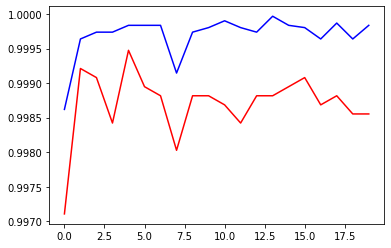

In [10]:
train_acc = []
test_acc = []

for n in range(5, 200, 10):
    clf = MLPClassifier(hidden_layer_sizes=(n,))
    clf.fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    
plt.plot(train_acc, 'b-')
plt.plot(test_acc, 'r-')

In [11]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=[4])

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9995397159389795
0.9990795529257068
